In [37]:
!curl https://raw.githubusercontent.com/MadanKrishnan97/CMPT459CourseProjectSpring2021/main/dataset/location.csv --output ../data/location.csv
!curl https://raw.githubusercontent.com/MadanKrishnan97/CMPT459CourseProjectSpring2021/main/dataset/cases_test.csv --output ../data/cases_test.csv
!curl https://raw.githubusercontent.com/MadanKrishnan97/CMPT459CourseProjectSpring2021/main/dataset/cases_train.csv --output ../data/cases_train.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  501k  100  501k    0     0   501k      0  0:00:01 --:--:--  0:00:01 2133k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  9 4307k    9  400k    0     0   400k      0  0:00:10 --:--:--  0:00:10 2327k
100 4307k  100 4307k    0     0  4307k      0  0:00:01 --:--:--  0:00:01 8111k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  9 43.2M    9 3987k    0     0  3987k      0  0:

In [38]:
# from google.colab import drive
# drive.mount('/content/drive')

In [39]:
!pip install pandas
!pip install numpy

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [40]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statistics
from datetime import datetime
from scipy.stats import zscore
from dataHandler import *

In [41]:
# BASE_PATH = os.path.dirname(__file__)
# BASE_DATA = BASE_PATH + '/data/'
# LOCATION_PATH = BASE_DATA + 'location.csv'
# TEST_PATH = BASE_DATA + 'cases_test.csv'
# TRAIN_PATH = BASE_DATA + 'cases_train.csv'


In [42]:
# na_lst = ['#N/A', '#N/A', 'N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', 'Unknown', 'unknown']
# location_data = pd.read_csv(LOCATION_PATH, na_values=na_lst)
# test_data = pd.read_csv(TEST_PATH, na_values=na_lst)
# train_data = pd.read_csv(TRAIN_PATH, na_values=na_lst)
# # location_data.head(20)
location_data, test_data, train_data = loadAllData()

In [43]:
"""
Train: 
Visualization: ignore additonal-info and source tab

contries(x)-outcome(y) -->bar-graph
age(x)-cases(y) -->histogram 
sex(x)-cases(y) --> bar graph 
lat(x)-long(y) -->scatter plot --> see clusters 
date(x)-cases(y) --> which date had more cases 
<province, country>(x)-cases(y)  

Location:
Visualization: ignore last update and province

lat(x)-long(y) -->scatter plot --> see clusters 
country multi-bar graph(X)-cases(y) -->confirmed(b), deaths(r), recovered(g), activer(p) -->each bar per country -->legend needed 
country(x)-incident-rate(y) 
country(x)-fatality-ratio(y) 
combined-key(x)-incidence-rate(y) 

"""

'\nTrain: \nVisualization: ignore additonal-info and source tab\n\ncontries(x)-outcome(y) -->bar-graph\nage(x)-cases(y) -->histogram \nsex(x)-cases(y) --> bar graph \nlat(x)-long(y) -->scatter plot --> see clusters \ndate(x)-cases(y) --> which date had more cases \n<province, country>(x)-cases(y)  \n\nLocation:\nVisualization: ignore last update and province\n\nlat(x)-long(y) -->scatter plot --> see clusters \ncountry multi-bar graph(X)-cases(y) -->confirmed(b), deaths(r), recovered(g), activer(p) -->each bar per country -->legend needed \ncountry(x)-incident-rate(y) \ncountry(x)-fatality-ratio(y) \ncombined-key(x)-incidence-rate(y) \n\n'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1C1F2070>,
      dtype=object)

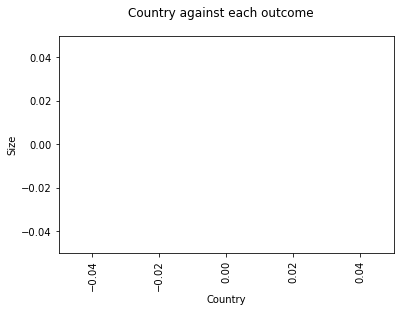

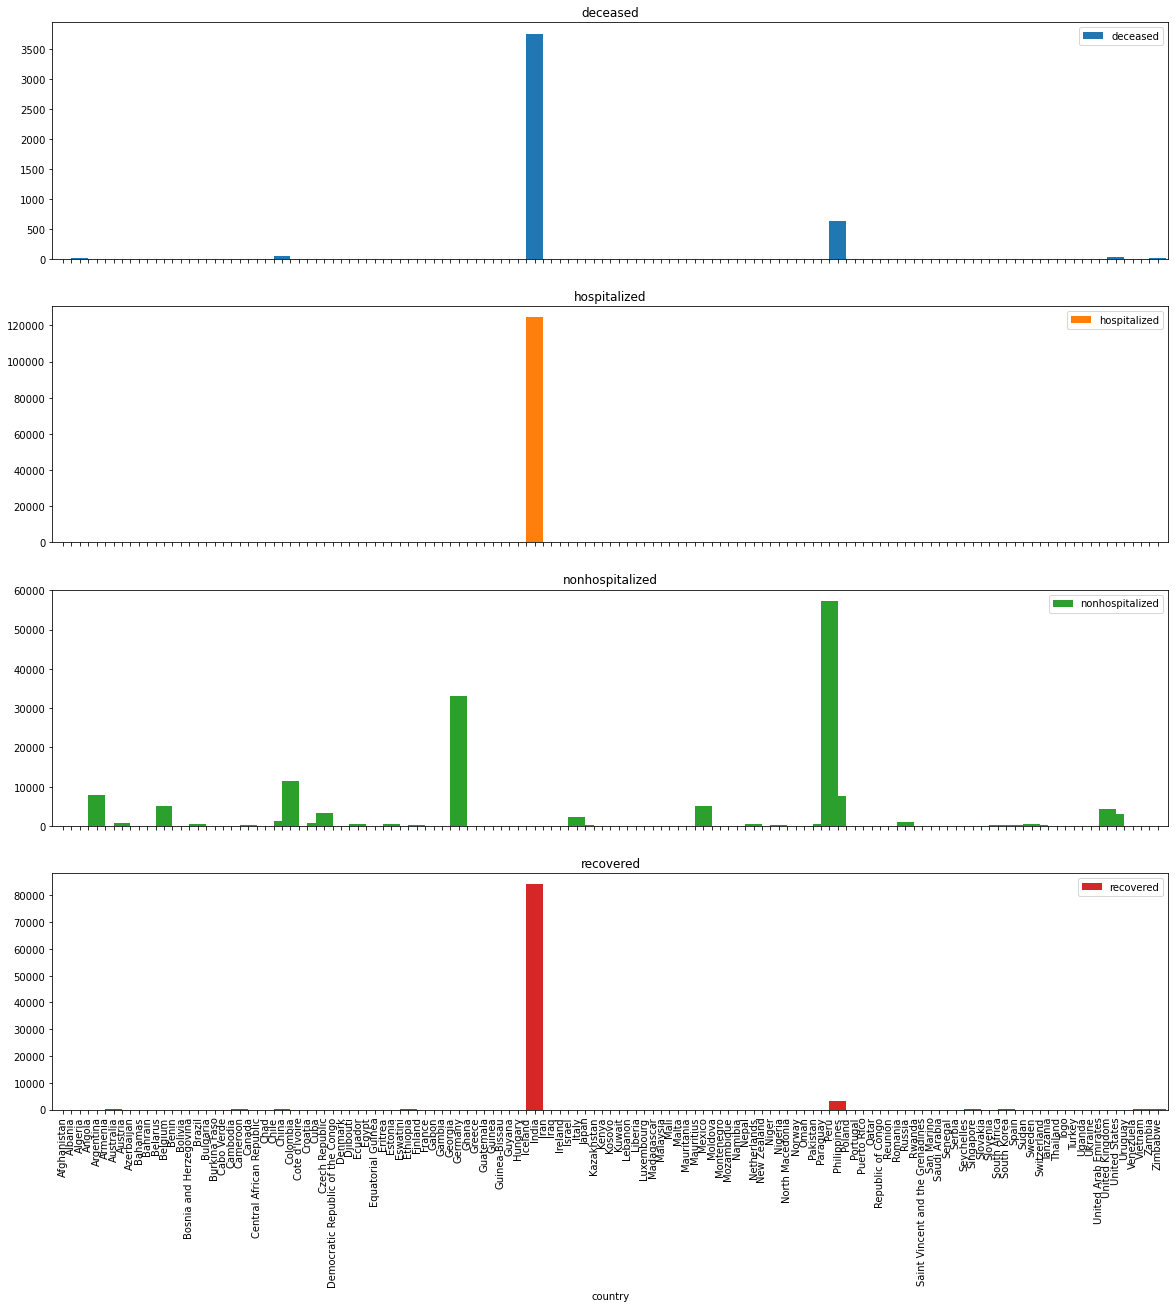

In [44]:
#Training data: contries(x)-outcome(y) -->bar-graph
plt.suptitle("Country against each outcome")
plt.xlabel("Country")
plt.ylabel("Size")
plt.xticks(rotation=90)
plt.autoscale(enable=True, tight=True)
train_data.pivot_table(index='country', columns='outcome', aggfunc='size').plot(kind = 'bar', figsize=(20,20), width = 2, subplots = True)
# plt.savefig('/content/drive/MyDrive/CMPT459Project/plots/Country_Outcome.png')

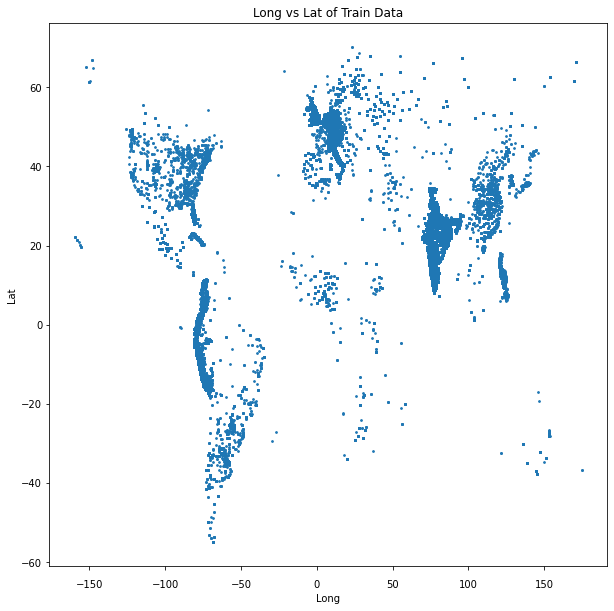

In [ ]:
# Trainging Data: lat(x)-long(y) -->scatter plot
plt.title("Long vs Lat of Train Data")
plt.xlabel("Long")
plt.ylabel("Lat")
plt.rcParams["figure.figsize"] = (6,6)
plt.scatter(train_data['longitude'], train_data['latitude'], s=3) #BEST ONE YET
# plt.savefig('/content/drive/MyDrive/CMPT459Project/plots/CountryLong_Lat_Train.png')

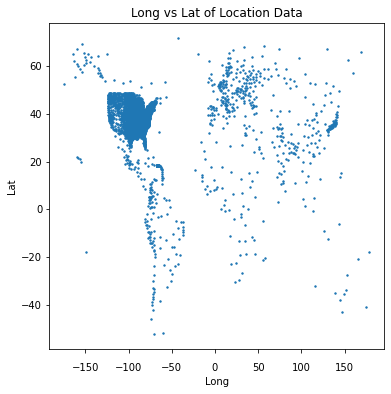

In [ ]:
# Location Data: lat(x)-long(y) -->scatter plot
plt.title("Long vs Lat of Location Data")
plt.xlabel("Long")
plt.ylabel("Lat")
plt.rcParams["figure.figsize"] = (6,6)
plt.scatter(location_data['Long_'], location_data['Lat'], s=2)
# plt.savefig('/content/drive/MyDrive/CMPT459Project/plots/Long_Lat_Location.png')

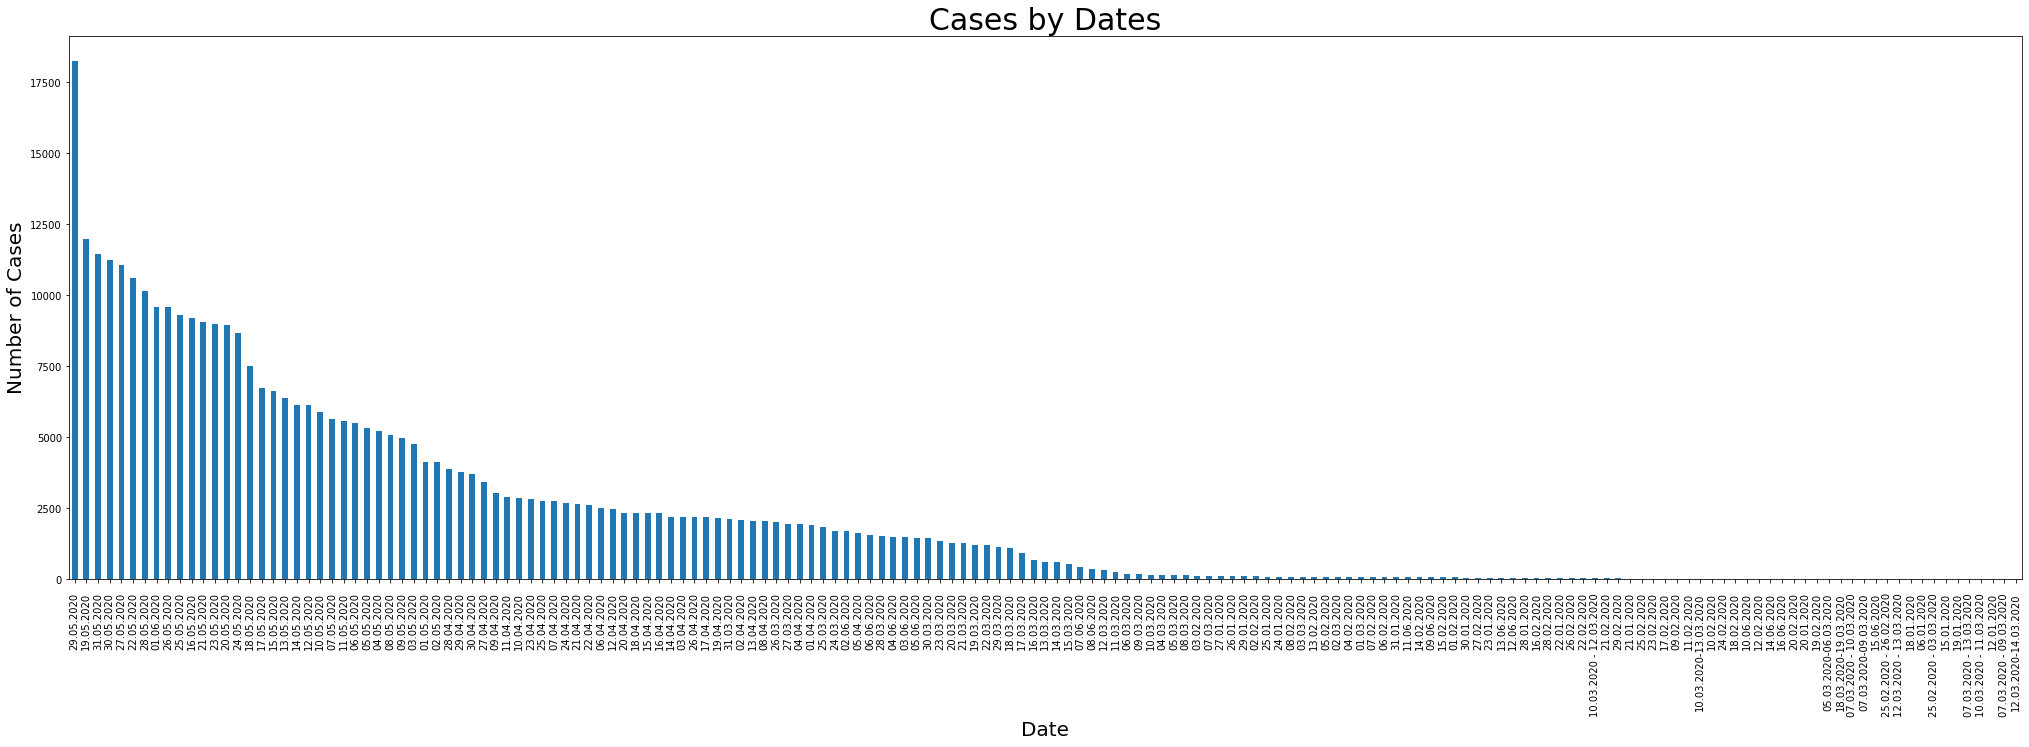

In [ ]:
# Training Data: date(x)-cases(y) --> which date had more cases
plt.title("Cases by Dates", fontsize = 30)
plt.xlabel("Date", fontsize = 20)
plt.ylabel("Number of Cases", fontsize = 20)
plt.rc('xtick' , labelsize = 10)
plt.rc('ytick' , labelsize = 10)
plt.rcParams['xtick.major.pad'] = '10'
ax = train_data['date_confirmation'].value_counts().plot(kind = 'bar', figsize=(35,10), width = 0.5)
# plt.savefig('/content/drive/MyDrive/CMPT459Project/plots/Cases_Date.png')

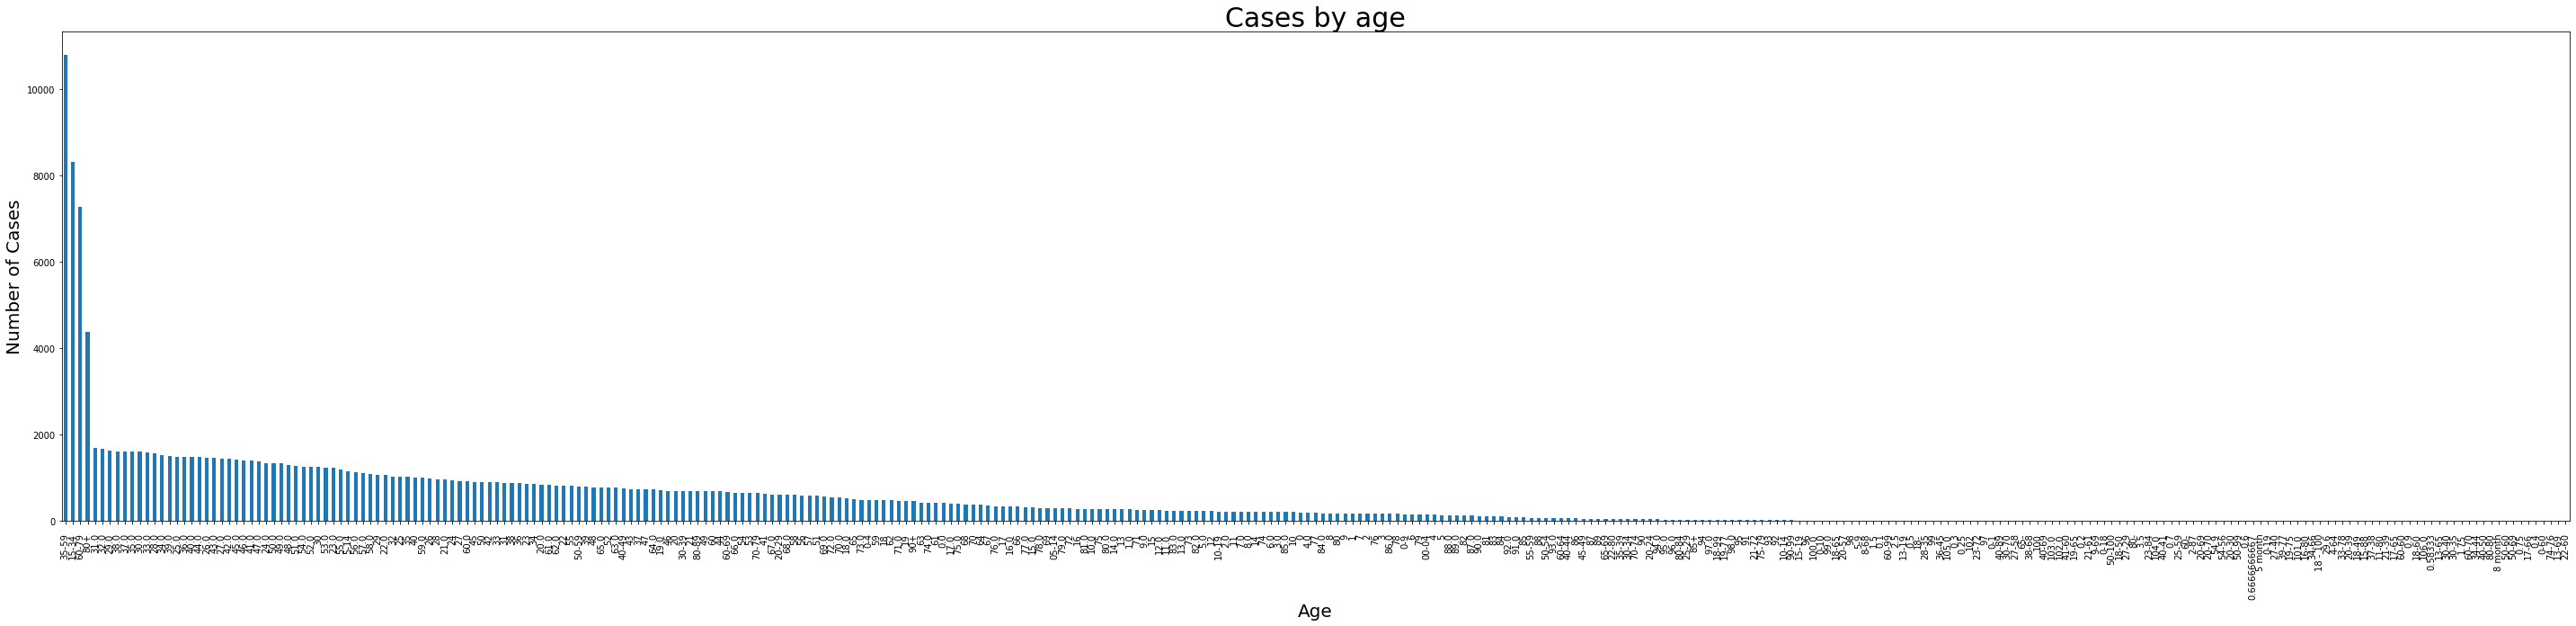

In [ ]:
# Trainging Data: age(x)-cases(y)
plt.title("Cases by age", fontsize = 30)
plt.xlabel("Age", fontsize = 20)
plt.ylabel("Number of Cases", fontsize = 20)
plt.rc('xtick' , labelsize = 10)
plt.rc('ytick' , labelsize = 10)
plt.rcParams['xtick.major.pad'] = '10'
ax = train_data['age'].value_counts().plot(kind = 'bar', figsize=(50,10), width = 0.5)
# plt.savefig('/content/drive/MyDrive/CMPT459Project/plots/Age_Cases.png')

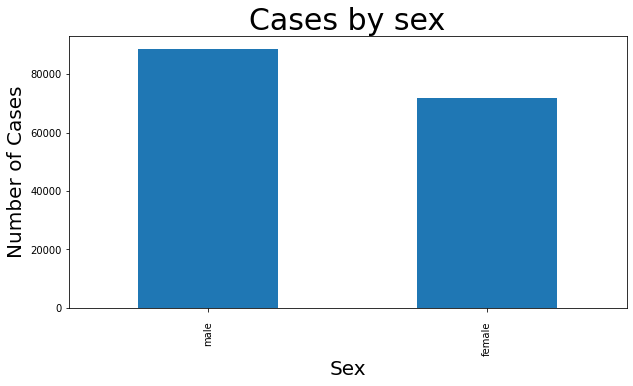

In [ ]:
#Training Data: sex(x)-cases(y) 
plt.title("Cases by sex", fontsize = 30)
plt.xlabel("Sex", fontsize = 20)
plt.ylabel("Number of Cases", fontsize = 20)
plt.rc('xtick' , labelsize = 15)
plt.rc('ytick' , labelsize = 10)
plt.autoscale(enable=True, tight=False)
ax = train_data['sex'].value_counts().plot(kind = 'bar', figsize=(10,5))
# plt.savefig('/content/drive/MyDrive/CMPT459Project/plots/Cases_Sex.png')

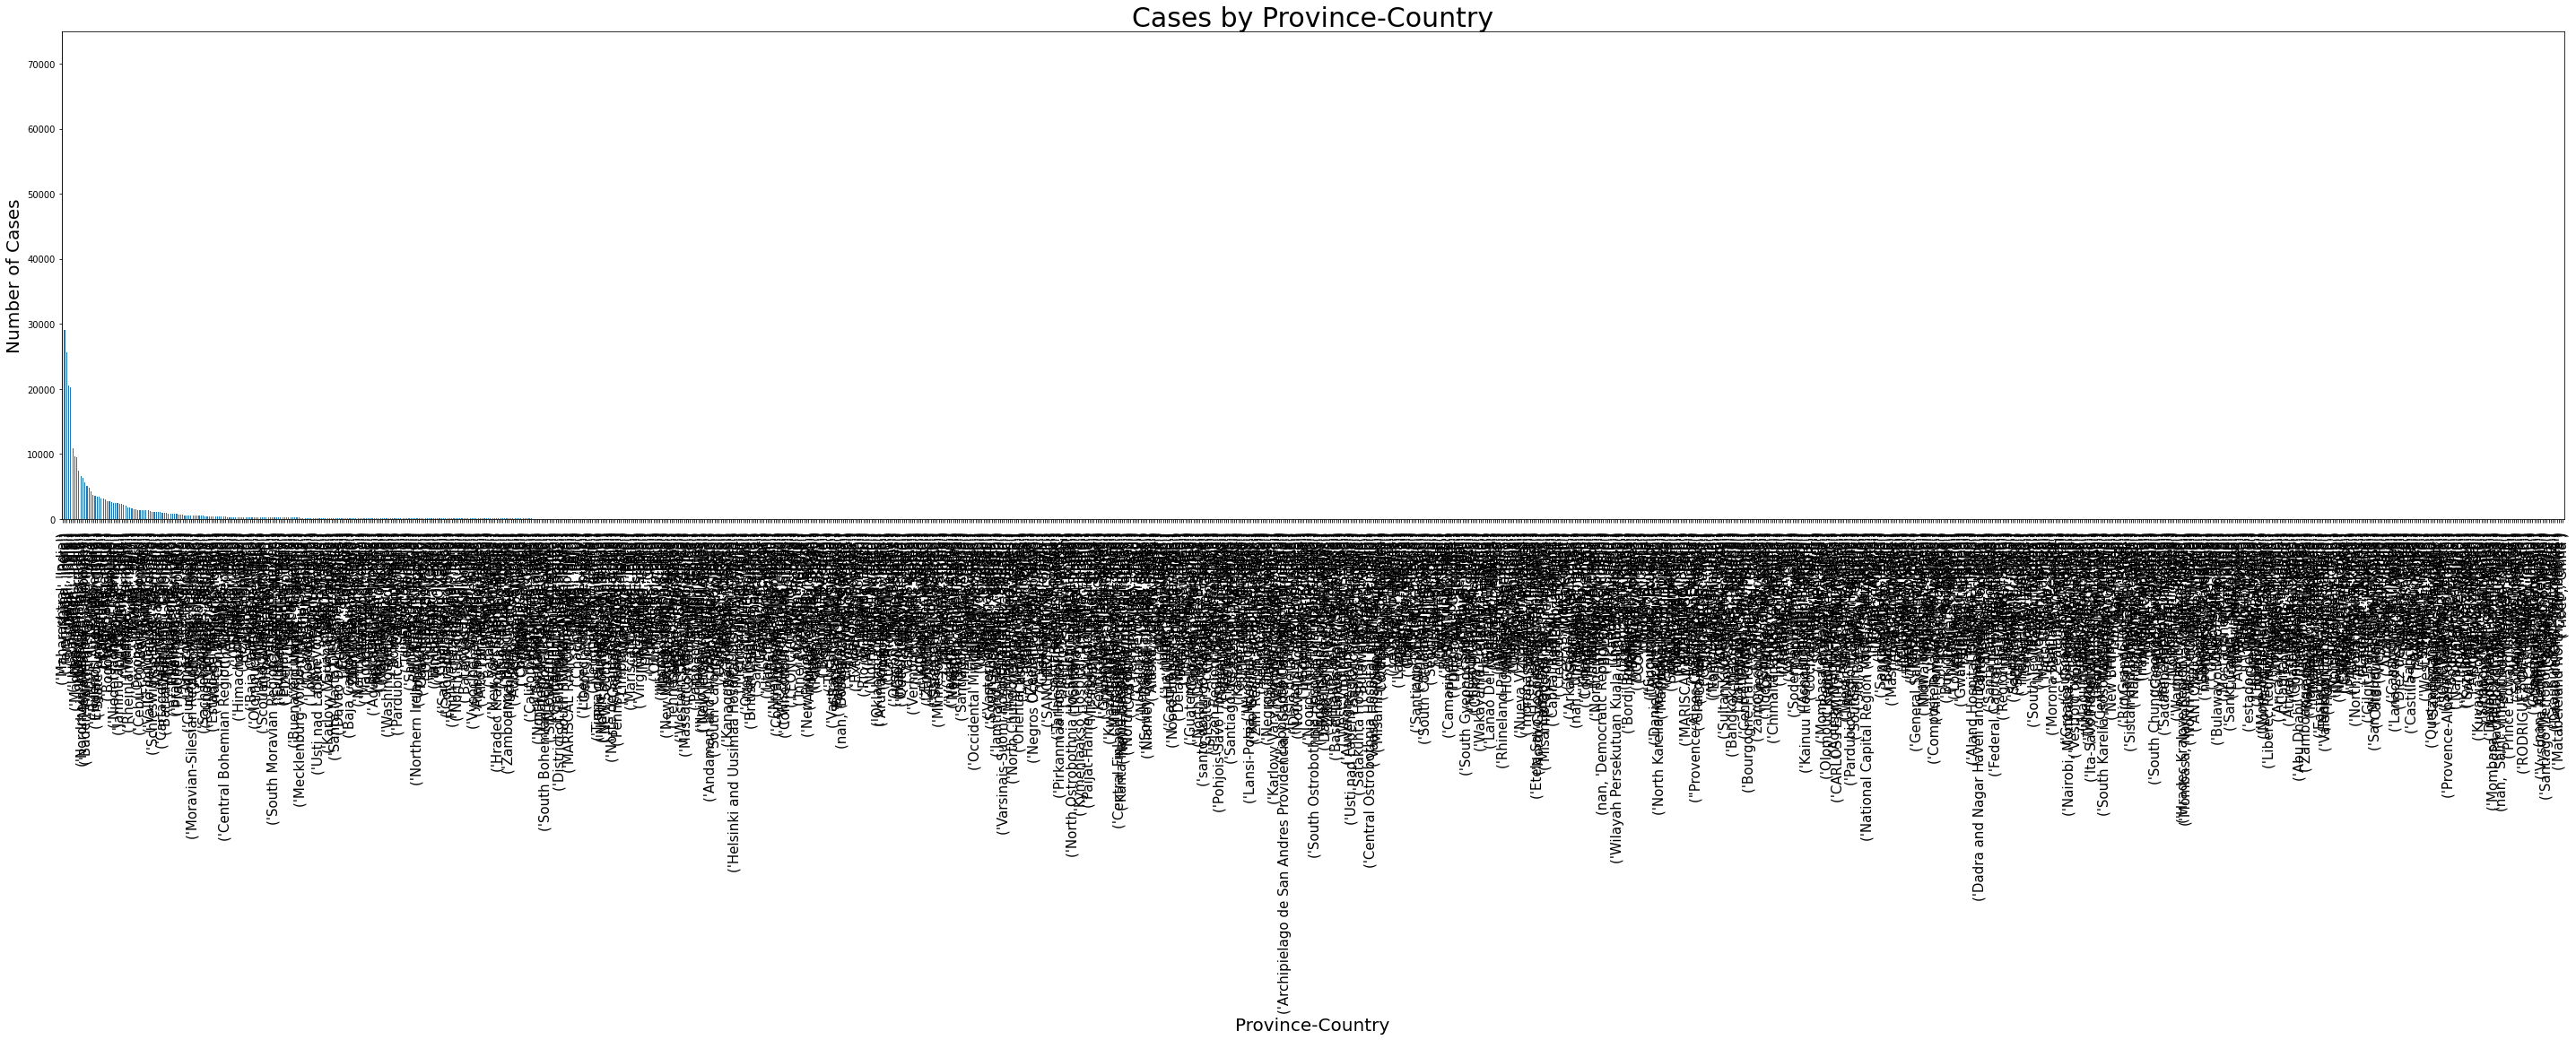

In [ ]:
##### NOTE: THIS PLOT WAS SKIPPED #########
# Training Data: <province, country>(x)-cases(y)
plt.title("Cases by Province-Country", fontsize = 30)
plt.xlabel("Province-Country", fontsize = 20)
plt.ylabel("Number of Cases", fontsize = 20)
t = train_data
t['prov-coun'] = list(zip(t.province, t.country))
t['prov-coun'] = t['prov-coun'].astype(str)
plt.rc('xtick' , labelsize = 2)
plt.rc('ytick' , labelsize = 10)
plt.autoscale(enable=True, tight=True)
ax = t['prov-coun'].value_counts().plot(kind = 'bar', figsize=(50,10))
# plt.savefig('/content/drive/MyDrive/CMPT459Project/plots/Cases_ProvinceCountry.png')

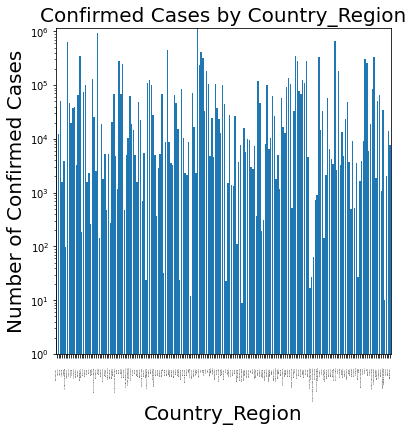

In [ ]:
# Location Data: country_region(x) --> log(confirmed(y))
plt.title("Confirmed Cases by Country_Region", fontsize = 20)
plt.xlabel("Country_Region", fontsize = 20)
plt.ylabel("Number of Confirmed Cases", fontsize = 20)
plt.rc('xtick' , labelsize = 7)
plt.rc('ytick' , labelsize = 10)
plt.yscale("log")
plt.rcParams["figure.figsize"] = (50,10)
plt.autoscale(enable=True, tight=True)
plt.xticks(rotation=90)
plt.bar(location_data['Country_Region'], location_data['Confirmed'])
# plt.savefig('/content/drive/MyDrive/CMPT459Project/plots/Confirmed_CountryRegion.png')

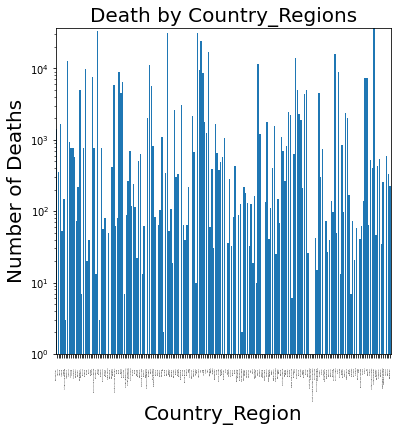

In [ ]:
# Location Data: country_region(x) --> log(Death(y))
plt.title("Death by Country_Regions", fontsize = 20)
plt.xlabel("Country_Region", fontsize = 20)
plt.ylabel("Number of Deaths", fontsize = 20)
plt.rc('xtick' , labelsize = 7)
plt.rc('ytick' , labelsize = 10)
plt.yscale("log")
plt.rcParams["figure.figsize"] = (50,10)
plt.autoscale(enable=True, tight=True)
plt.xticks(rotation=90)
plt.bar(location_data['Country_Region'], location_data['Deaths'])
# plt.savefig('/content/drive/MyDrive/CMPT459Project/plots/CountryRegion_Deaths.png')

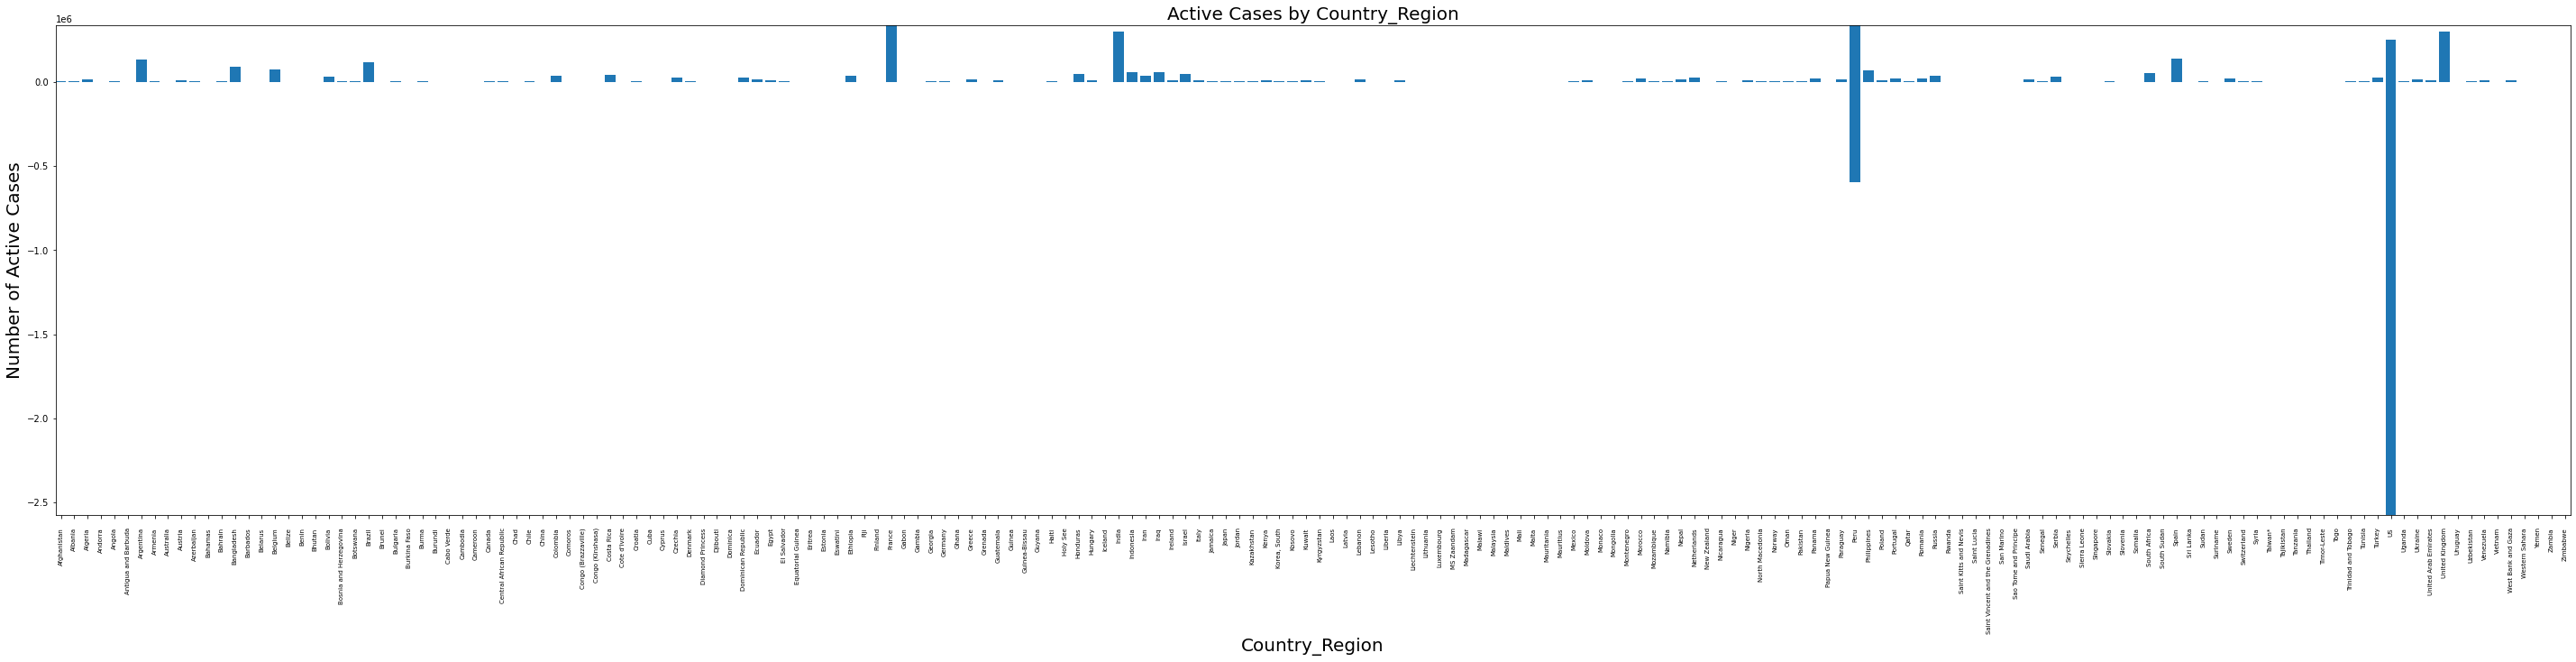

In [ ]:
# Location Data: country_region(x) --> Active Cases(y)
plt.title("Active Cases by Country_Region", fontsize = 20)
plt.xlabel("Country_Region", fontsize = 20)
plt.ylabel("Number of Active Cases", fontsize = 20)
plt.rc('xtick' , labelsize = 7)
plt.rc('ytick' , labelsize = 10)
plt.autoscale(enable=True, tight=True)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (50,10)
plt.bar(location_data['Country_Region'], location_data['Active'])
# plt.savefig('/content/drive/MyDrive/CMPT459Project/plots/CountryRegion_Active.png')

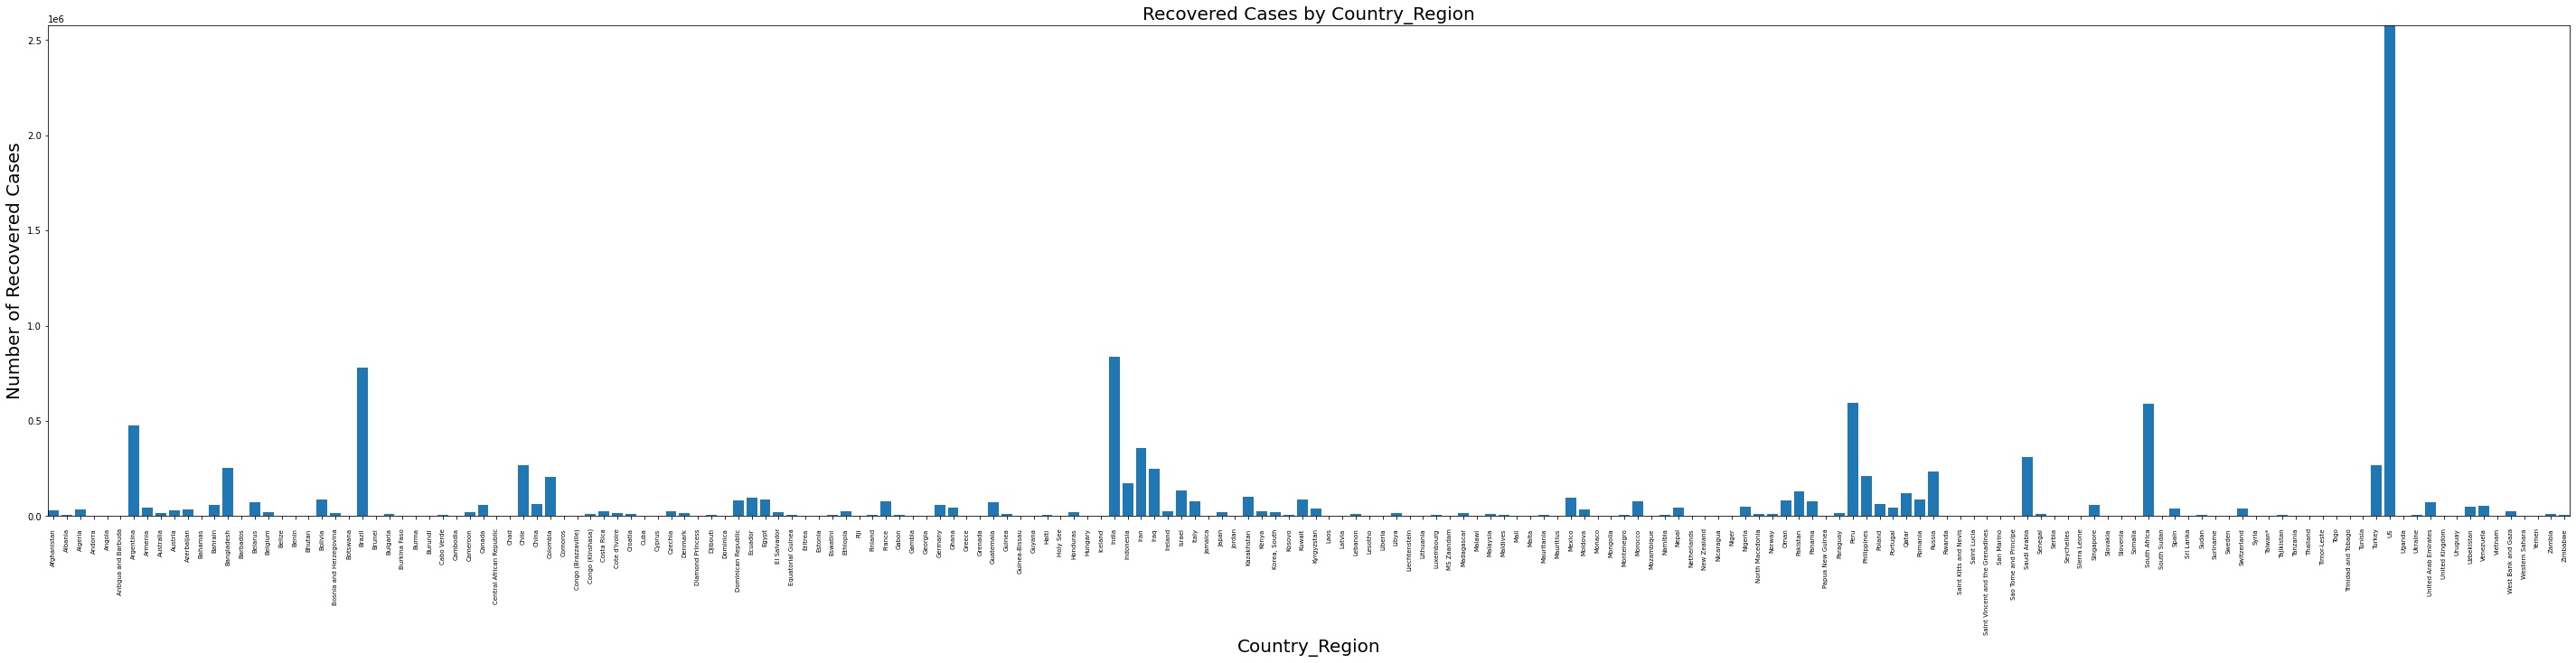

In [ ]:
#Maybe: LOG this?
# Location Data: country_region(x) --> recovered Cases(y)
plt.title("Recovered Cases by Country_Region", fontsize = 20)
plt.xlabel("Country_Region", fontsize = 20)
plt.ylabel("Number of Recovered Cases", fontsize = 20)
plt.rc('xtick' , labelsize = 7)
plt.rc('ytick' , labelsize = 10)
plt.rcParams["figure.figsize"] = (50,10)
plt.autoscale(enable=True, tight=True)
plt.xticks(rotation=90)
plt.bar(location_data['Country_Region'], location_data['Recovered'])
# plt.savefig('/content/drive/MyDrive/CMPT459Project/plots/CountryRegion_Recovered.png')

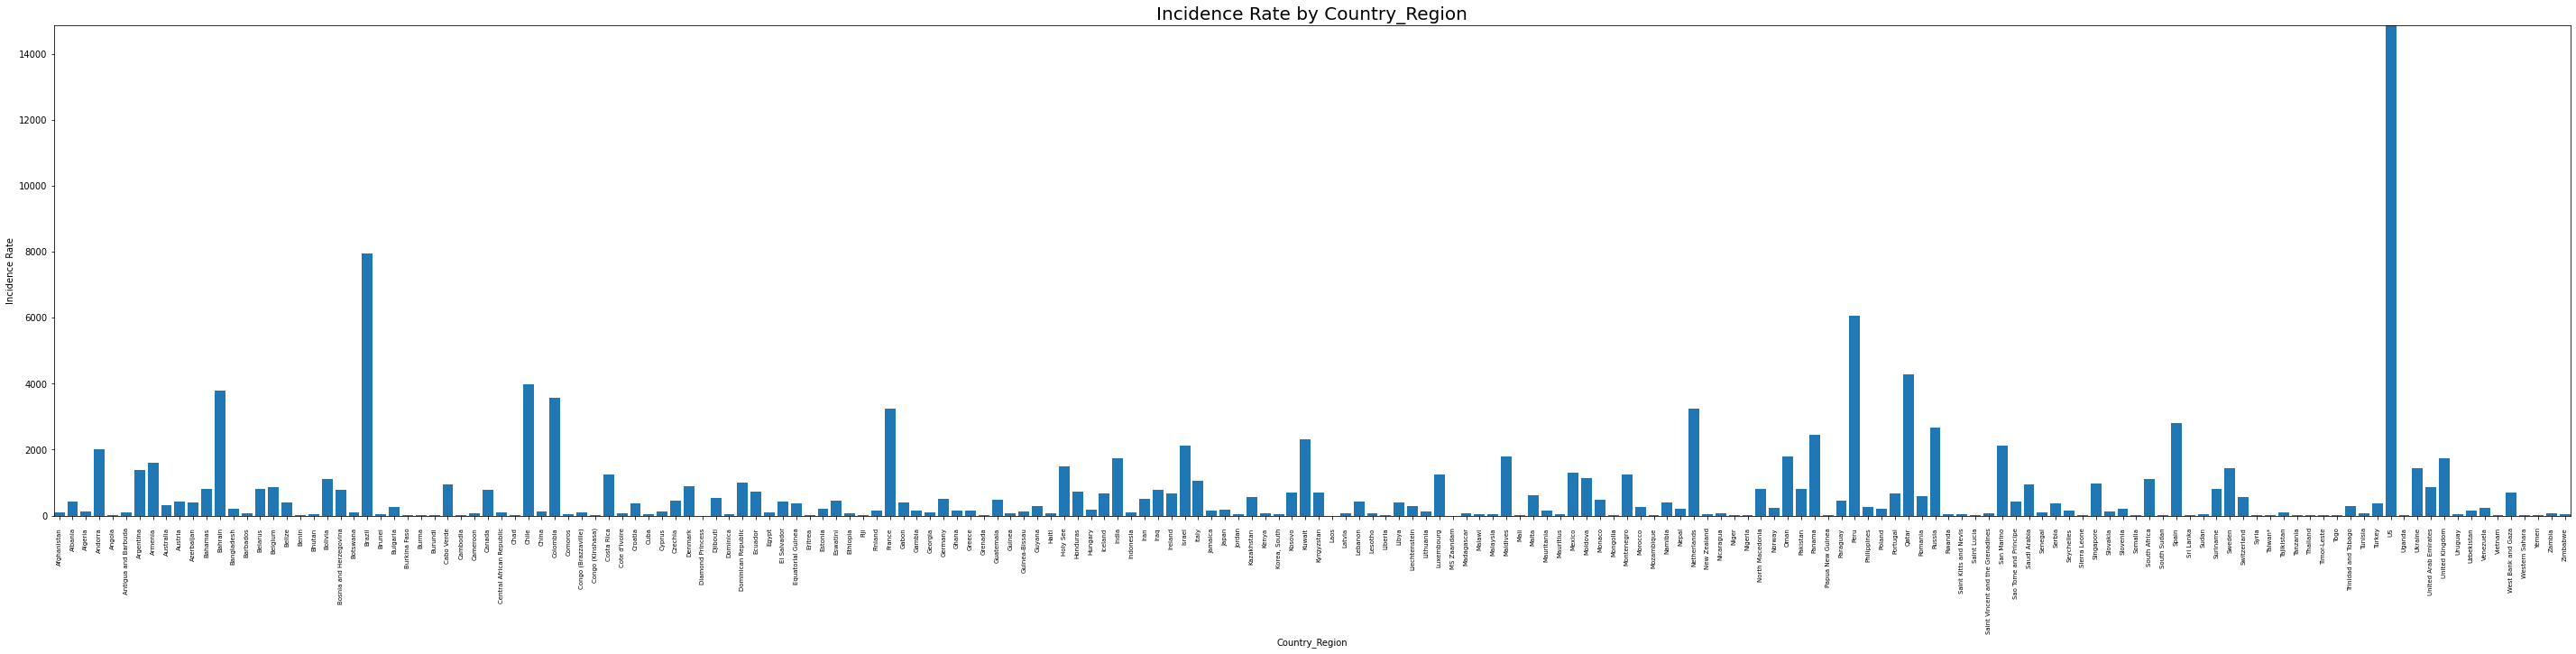

In [ ]:
# Location Data: country_region(x) --> Incident Rate(y)
plt.title("Incidence Rate by Country_Region", fontsize = 20)
plt.xlabel("Country_Region", fontsize = 10)
plt.ylabel("Incidence Rate", fontsize = 10)
plt.rc('xtick' , labelsize = 7)
plt.rc('ytick' , labelsize = 10)
plt.rcParams["figure.figsize"] = (40,10)
plt.autoscale(enable=True, tight=True)
plt.xticks(rotation=90)
plt.bar(location_data['Country_Region'], location_data['Incidence_Rate'])
# plt.savefig('/content/drive/MyDrive/CMPT459Project/plots/CountryRegion_IncicdentRate.png')

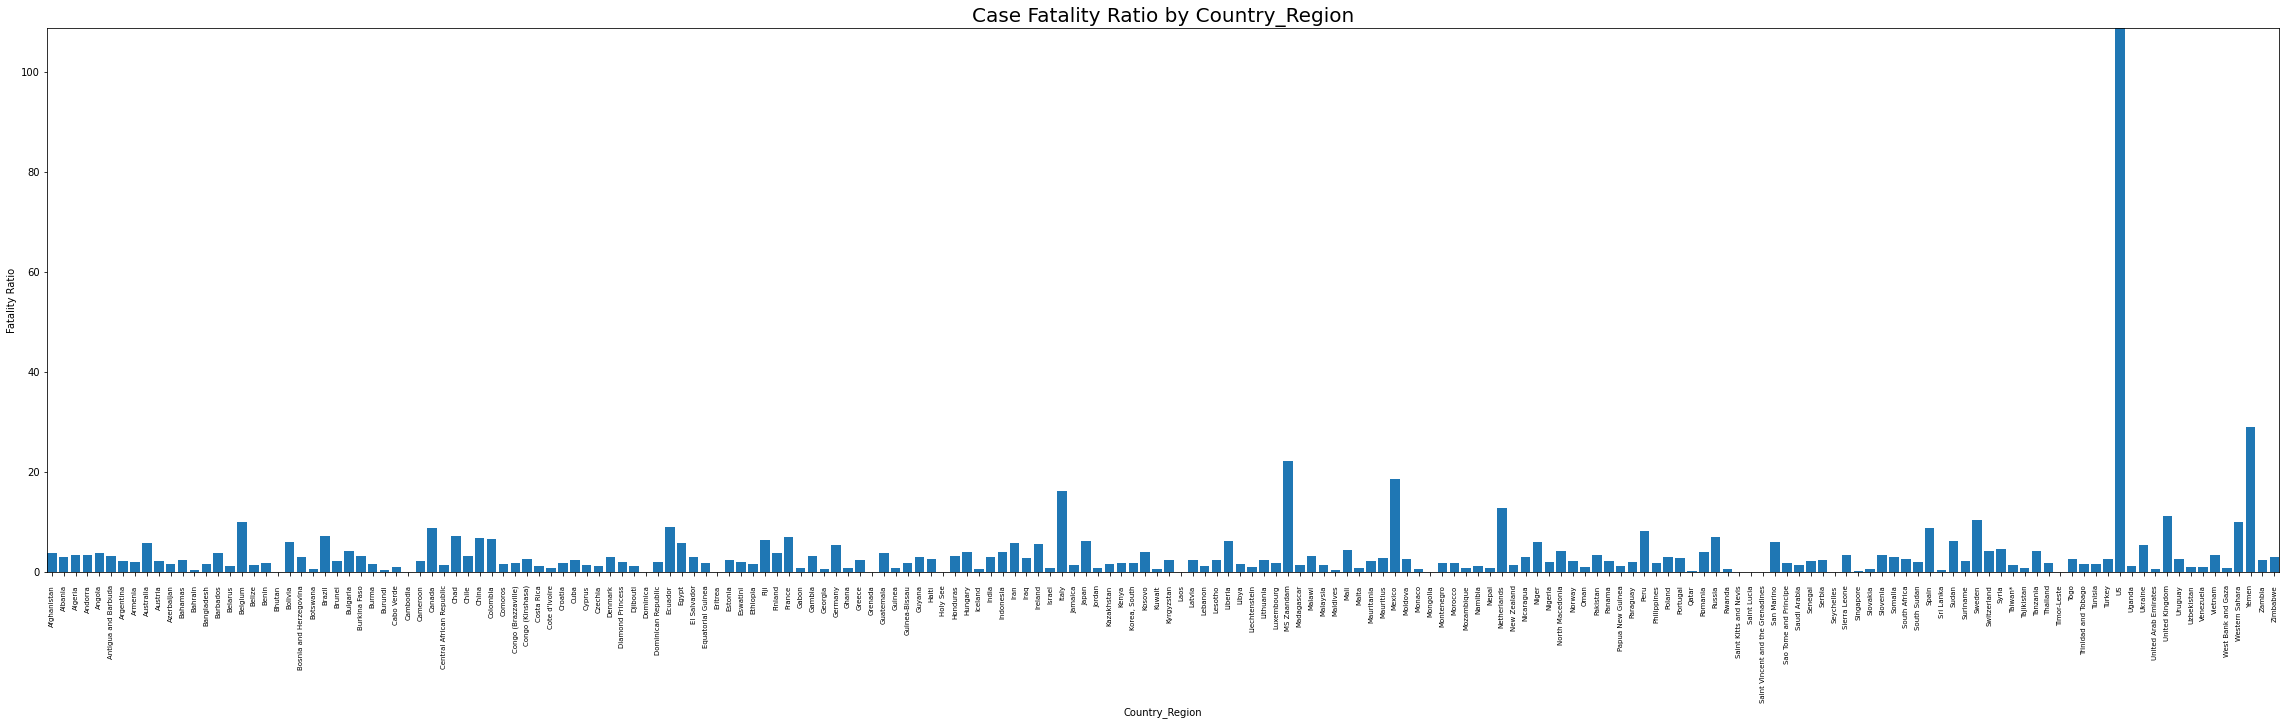

In [ ]:
# Location Data: country_region(x) --> Fatality ratio(y)
plt.title("Case Fatality Ratio by Country_Region", fontsize = 20)
plt.xlabel("Country_Region", fontsize = 10)
plt.ylabel("Fatality Ratio", fontsize = 10)
plt.rc('xtick' , labelsize = 7)
plt.rc('ytick' , labelsize = 10)
plt.rcParams["figure.figsize"] = (40,10)
plt.autoscale(enable=True, tight=True)
plt.xticks(rotation=90)
plt.bar(location_data['Country_Region'], location_data['Case-Fatality_Ratio'])
# plt.savefig('/content/drive/MyDrive/CMPT459Project/plots/CountryRegion_FatalityRatio.png')

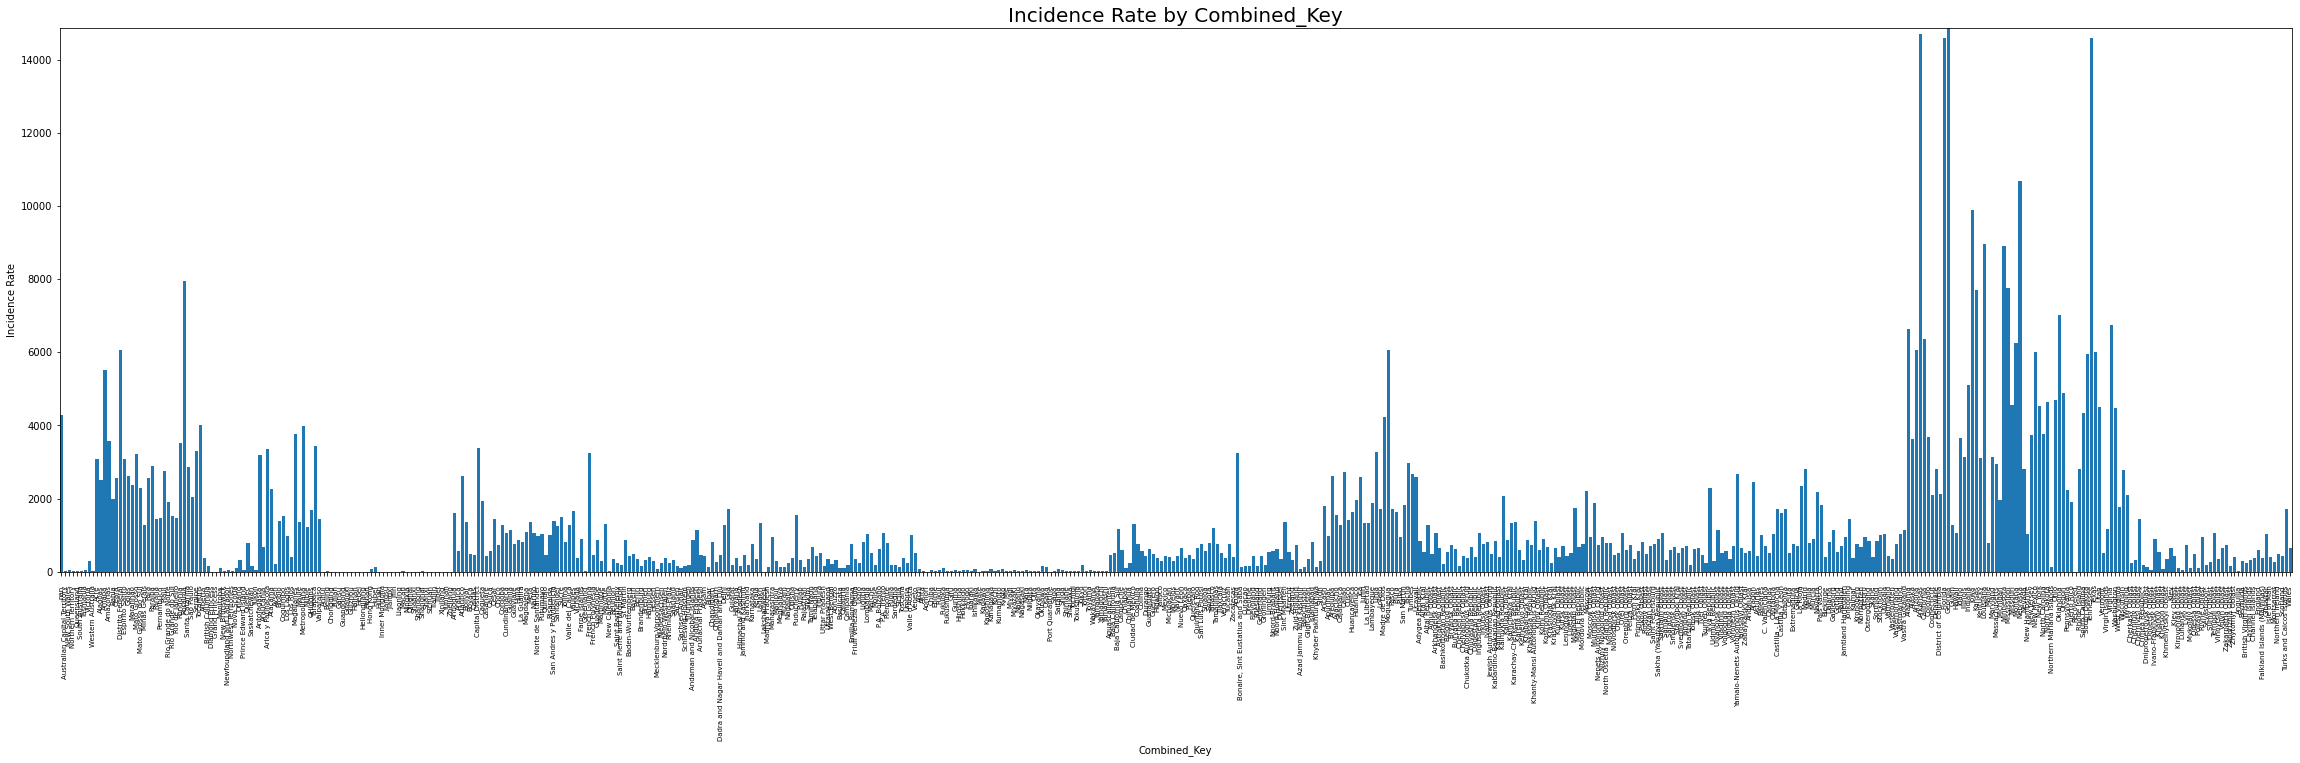

In [ ]:
# Location Data: Combined key(x) --> incident rate(y)
plt.title("Incidence Rate by Combined_Key", fontsize = 20)
plt.xlabel("Combined_Key", fontsize = 10)
plt.ylabel("Incidence Rate", fontsize = 10)
plt.rc('xtick' , labelsize = 3)
plt.rc('ytick' , labelsize = 10)
plt.rcParams["figure.figsize"] = (40,10)
plt.autoscale(enable=True, tight=True)
plt.xticks(rotation=90)
location_data['Province_State'] = location_data['Province_State'].astype(str)
plt.bar(location_data['Province_State'], location_data['Incidence_Rate'])
# plt.savefig('/content/drive/MyDrive/CMPT459Project/plots/IncidenceRate_CombinedKey.png')

In [1]:
# Location Data: total number(y) --> Active cases, deaths, recovered cases, confirmed cases(y) 
plt.title("Confirmed Cases by Combined_Key", fontsize = 20)
plt.xlabel("Combined_Key", fontsize = 10)
plt.ylabel("Number of Confirmed Cases", fontsize = 10) # 
plt.rc('xtick' , labelsize = 10)
plt.rc('ytick' , labelsize = 10)
plt.rcParams["figure.figsize"] = (10,10)
plt.xticks(rotation=90)
location_data[['Confirmed','Recovered', 'Active', 'Deaths']].sum().plot.bar()
# plt.savefig('/content/drive/MyDrive/CMPT459Project/plots/ConfirmedCases_CombinedKey.png')

NameError: name 'plt' is not defined

In [ ]:
missing_train = train_data.isnull().sum(axis = 0)
missing_loc = location_data.isnull().sum(axis = 0)
print("==============Missing values in each data==============")
print("\n")
print("--------Training Data--------")
print(missing_train)
print("-----------------------------")
print("\n")
print("--------Location Data--------")
print(missing_loc)
print("-----------------------------")

==============Missing values in each data==============


--------Training Data--------
age                       209265
sex                       207084
province                    4106
country                       18
latitude                       2
longitude                      2
date_confirmation            288
additional_information    344912
source                    128478
outcome                        0
dtype: int64
-----------------------------


--------Location Data--------
Province_State         176
Country_Region           0
Last_Update              0
Lat                     80
Long_                   80
Confirmed                0
Deaths                   0
Recovered                0
Active                   2
Combined_Key             0
Incidence_Rate          80
Case-Fatality_Ratio     48
dtype: int64
-----------------------------
